In [1]:
import easyocr
from PIL import Image
import io
import re
import pandas as pd
import psycopg2

In [18]:
reader = easyocr.Reader(['en'])
image_path = "C:\\Users\\Saravanan\\OneDrive\\Desktop\\Bizcard\\2.png"
result = reader.readtext(image_path)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[126, 126], [402, 126], [402, 178], [126, 178]],
  'Amit kumar',
  0.8217942477635098),
 ([[125, 193], [393, 193], [393, 229], [125, 229]],
  'CEO & FOUNDER',
  0.9981913601976996),
 ([[172, 278], [342, 278], [342, 310], [172, 310]],
  '123-456-7569',
  0.7599104170013044),
 ([[169, 331], [411, 331], [411, 371], [169, 371]],
  'hello@global.com',
  0.9396091445440375),
 ([[168, 388], [240, 388], [240, 412], [168, 412]], 'WWW', 0.9990257007900342),
 ([[241, 381], [393, 381], [393, 419], [241, 419]],
  'global.com',
  0.6216656909536002),
 ([[167, 428], [308, 428], [308, 472], [167, 472]],
  '123 global',
  0.980461343008494),
 ([[349, 427], [449, 427], [449, 472], [349, 472]],
  'Erode,',
  0.8696428830728805),
 ([[651, 410], [930, 410], [930, 484], [651, 484]],
  'GLOBAL',
  0.9999419399037105),
 ([[166, 472], [416, 472], [416, 504], [166, 504]],
  'TamilNadu 600115',
  0.9996330221302328),
 ([[590, 505], [986, 505], [986, 573], [590, 573]],
  'INSURANCE',
  0.85019385074969),
 ([[3

In [19]:

reader = easyocr.Reader(['en'], gpu=False)
image_path = "C:\\Users\\Saravanan\\OneDrive\\Desktop\\Bizcard\\2.png"
image_data = reader.readtext(image_path, detail = 0)
image_data

Using CPU. Note: This module is much faster with a GPU.


['Amit kumar',
 'CEO & FOUNDER',
 '123-456-7569',
 'hello@global.com',
 'WWW',
 'global.com',
 '123 global',
 'Erode,',
 'GLOBAL',
 'TamilNadu 600115',
 'INSURANCE',
 'St ,']

In [20]:
image = Image.open(image_path)
# Convert RGBA image to RGB
image = image.convert('RGB')

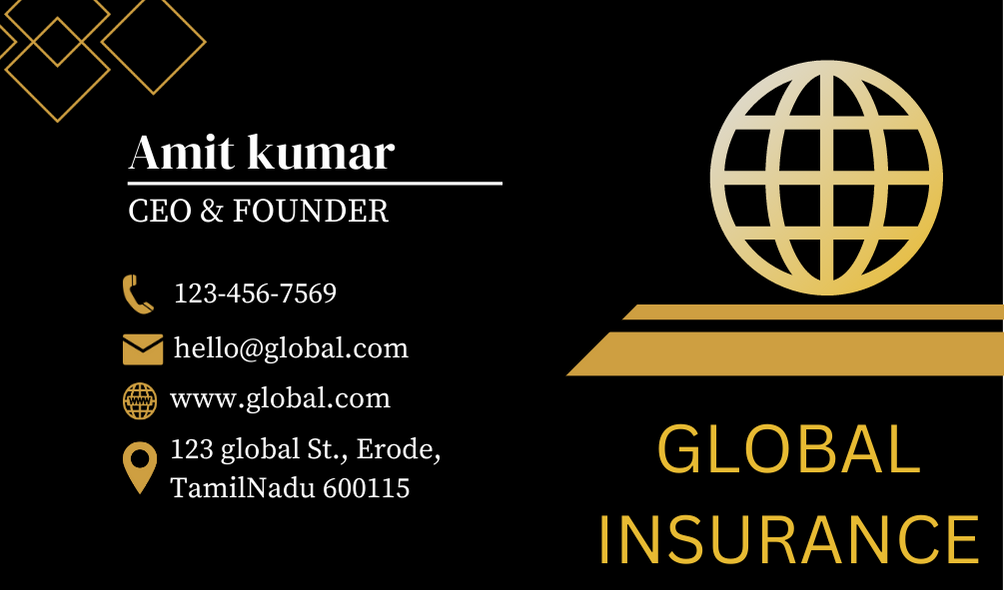

In [21]:
image

In [22]:
# Convert the image to binary data
def img_to_binary(image):
    image_binary = io.BytesIO()
    image.save(image_binary, format='JPEG')
    image_binary = image_binary.getvalue()
    return image_binary

In [23]:
details =[]
for i in range(len(result)):
    details.append(result[i][1])
name = []
designation = []
contact =[]
email =[]
website = []
street =[]
city =[]
state =[]
pincode=[]
company =[]

In [24]:
details

['Amit kumar',
 'CEO & FOUNDER',
 '123-456-7569',
 'hello@global.com',
 'WWW',
 'global.com',
 '123 global',
 'Erode,',
 'GLOBAL',
 'TamilNadu 600115',
 'INSURANCE',
 'St ,']

In [25]:
image_data

['Amit kumar',
 'CEO & FOUNDER',
 '123-456-7569',
 'hello@global.com',
 'WWW',
 'global.com',
 '123 global',
 'Erode,',
 'GLOBAL',
 'TamilNadu 600115',
 'INSURANCE',
 'St ,']

In [39]:
def extracted_text(details):
    data = {
        "name": [],
        "designation": [],
        "contact": [],
        "email": [],
        "website": [],
        "street": [],
        "city": [],
        "state": [],
        "pincode": [],
        "company": []
    }
    for i in range(len(details)):
        match1 = re.findall('([0-9]+ [A-Z]+ [A-Za-z]+)., ([a-zA-Z]+). ([a-zA-Z]+)', details[i])
        match2 = re.findall('([0-9]+ [A-Z]+ [A-Za-z]+)., ([a-zA-Z]+)', details[i])
        match3 = re.findall('^[E].+[a-z]', details[i])
        match4 = re.findall('([A-Za-z]+) ([0-9]+)', details[i])
        match5 = re.findall('([0-9]+ [a-zA-z]+)', details[i])
        match6 = re.findall('.com$', details[i])
        match7 = re.findall('([0-9]+)', details[i])
        if i == 0:
            data["name"].append(details[i])
        elif i == 1:
            data["designation"].append(details[i])
        elif '-' in details[i]:
            data["contact"].append(details[i])
        elif '@' in details[i]:
            data["email"].append(details[i])
        elif "www " in details[i].lower() or "www." in details[i].lower():
            data["website"].append(details[i])
        elif "WWW" in details[i]:
            data["website"].append(details[i] + "." + details[i+1])
        elif match6:
            pass
        elif match1:
            data["street"].append(match1[0][0])
            data["city"].append(match1[0][1])
            data["state"].append(match1[0][2])
        elif match2:
            data["street"].append(match2[0][0])
            data["city"].append(match2[0][1])
        elif match3:
            data["city"].append(match3[0])
        elif match4:
            data["state"].append(match4[0][0])
            data["pincode"].append(match4[0][1])
        elif match5:
            data["street"].append(match5[0] + ' St,')
        elif match7:
            data["pincode"].append(match7[0])
        else:
            data["company"].append(details[i])

    data["contact"] = [" & ".join(data["contact"])]
    # Join company names with comma and space
    data["company"] = [" ".join(data["company"])]
    return data
     

In [40]:
data = extracted_text(image_data)
data
     

{'name': ['Amit kumar'],
 'designation': ['CEO & FOUNDER'],
 'contact': ['123-456-7569'],
 'email': ['hello@global.com'],
 'website': ['WWW.global.com'],
 'street': ['123 global St,'],
 'city': ['Erode'],
 'state': ['TamilNadu'],
 'pincode': ['600115'],
 'company': ['GLOBAL INSURANCE St ,']}

In [71]:

import pandas as pd
df = pd.DataFrame(data)
df

,name,designation,contact,email,website,street,city,state,pincode,company
0,Amit kumar,CEO & FOUNDER,123-456-7569,hello@global.com,WWW.global.com,"123 global St,",Erode,TamilNadu,600115,"GLOBAL INSURANCE St ,"


In [ ]:
df = df.append(data, ignore_index=True)

In [88]:
df

,name,designation,contact,email,website,street,city,state,pincode,company
0,Amit kumar,CEO & FOUNDER,123-456-7569,hello@global.com,WWW.global.com,"123 global St,",Erode,TamilNadu,600115,"GLOBAL INSURANCE St ,"


In [89]:
import psycopg2

In [101]:
mydb = psycopg2.connect(host='localhost', user='postgres', password='123456', database='bizcard', port=5432)
cursor = mydb.cursor()

In [102]:
def details_table():
    try:
        create_table_query = """
        CREATE TABLE IF NOT EXISTS your_table (
            name VARCHAR(255),
            designation VARCHAR(255),
            contact VARCHAR(255),
            email VARCHAR(255),
            website VARCHAR(255),
            street VARCHAR(255),
            city VARCHAR(255),
            state VARCHAR(255),
            pincode VARCHAR(255),
            company VARCHAR(255))"""
        cursor.execute(create_table_query)

    # Inserting each row into the database
        for index, row in df.iterrows():
            insert_query = '''
            INSERT INTO your_table (name, designation, contact, email, website, street, city, state, pincode, company, image_data) 
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
            '''
            cursor.execute(insert_query, (row['name'], row['designation'], row['contact'], row['email'], row['website'], row['street'], 
                                        row['city'], row['state'], row['pincode'], row['company']))
            
        # Commit the transaction
        mydb.commit()

    except Exception as e:
        print("Error:", e)
        # Rollback the transaction if an exception occurs
        mydb.rollback()


In [103]:
a=details_table()
a

Error: tuple index out of range


In [16]:
UPDATE image
SET name = saran
WHERE Selva;


SyntaxError: invalid syntax (4193950043.py, line 1)

In [17]:
import psycopg2
client=psycopg2.connect(host='localhost',user='postgres',password='123456',database='bizcard',port=5432)
access=client.cursor()
print("Before Update")
access.execute("""select * from image""")
x=access.fetchall()
for i in x:
    print(i)
access.execute("update image set name=input() where city='Chennai'")
client.commit()

Before Update
('Selva', 'DATA MANAGER', '+123-456-7890 & +123-456-7891', 'hello@XYZ1.com', 'WWW XYZI.com', '123 ABC St', 'Chennai', 'TamilNadu', '600113', 'selva digitals', <memory at 0x0000019FE0B6EEC0>)


UndefinedFunction: function input() does not exist
LINE 1: update image set name=input() where city='Chennai'
                              ^
HINT:  No function matches the given name and argument types. You might need to add explicit type casts.
